In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics, model_selection
from joblib import dump, load


pd.set_option('display.max_columns', None)

# Load data

In [2]:
df = pd.read_csv('clean_data.csv')

Proportion of accepted and rejected proposal

In [3]:
df["TARGET"].value_counts(normalize=True)*100

0    90.499426
1     9.500574
Name: TARGET, dtype: float64

In [4]:
df.columns[2:]

Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AGE', 'YEARS_EMPLOYED',
       'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Other',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'CODE_GENDER_M', 'OCCUPATION_TYPE_Accountants',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Medicine staff',
       'OCCUPATION_TYPE_Other', 'OCCUPATION_TYPE_Private service staff',
       'OCCUPATION_TYPE_Realty agents',

In [5]:
df.head(10)

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_ANNUITY,AGE,YEARS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Other,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,CREDIT_active,CREDIT_MEAN_OVERDUE_active,CREDIT_MEAN_active,proportion_OVERDUE_active,CREDIT_sold,CREDIT_MEAN_OVERDUE_sold,CREDIT_MEAN_sold,proportion_OVERDUE_sold,CREDIT_closed,CREDIT_MEAN_OVERDUE_closed,CREDIT_MEAN_closed,proportion_OVERDUE_closed,CREDIT_bad,CREDIT_MEAN_OVERDUE_bad,CREDIT_MEAN_bad,proportion_OVERDUE_bad,previous_CREDIT
0,100002,1,202500.0,24700.5,25.956104,1.747599,0.0,1.0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.00,450000.000,0.000000,0.0,0.0,0.0,0.0,1.0,2091.16125,76613.400000,0.027295,0.0,0.0,0.0,0.0,179055.000000
1,100008,0,99000.0,27517.5,46.477366,4.356653,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.00,267606.000,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,100419.750000,0.000000,0.0,0.0,0.0,0.0,162767.700000
2,100009,0,171000.0,41301.0,37.799726,8.587106,17.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.00,490180.500,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,115057.730769,0.000000,0.0,0.0,0.0,0.0,70137.642857
3,100014,0,112500.0,21177.0,27.975309,1.862826,0.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,6376.14,502875.000,0.012679,0.0,0.0,0.0,0.0,1.0,2401.45875,164836.485000,0.014569,0.0,0.0,0.0,0.0,102834.000000
4,100016,0,67500.0,5881.5,36.869684,7.454047,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.0,0.00,84189.375,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,46075.500000,0.000000,0.0,0.0,0.0,0.0,106221.375000
5,100019,0,157500.0,20160.0,23.945130,3.174211,17.0,1.0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.00,450000.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,104683.500000
6,100020,0,108000.0,26149.5,35.475995,3.613169,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,0.00,75600.000,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,24142.500000,0.000000,0.0,0.0,0.0,0.0,41706.000000
7,100023,0,90000.0,17563.5,31.133059,5.591221,0.0,2.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.0,0.00,164428.875,0.000000,0.0,0.0,0.0,0.0,1.0,4081.27500,95372.105625,0.042793,0.0,0.0,0.0,0.0,113517.000000
8,100030,0,90000.0,11074.5,53.042524,9.585734,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0.00,508500.000,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,22482.742500,0.000000,0.0,0.0,0.0,0.0,32534.643750
9,100031,1,112500.0,27076.5,51.368999,7.209877,0.0,1.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0.00,548779.500,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,372186.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [6]:
for col in ["AMT_INCOME_TOTAL", "AMT_ANNUITY", "CREDIT_MEAN_OVERDUE_active", 
 "CREDIT_MEAN_active", "CREDIT_MEAN_OVERDUE_sold", "CREDIT_MEAN_sold",
"CREDIT_MEAN_OVERDUE_closed", "CREDIT_MEAN_closed", "previous_CREDIT"]:
    df[col] = np.log10(df[col]+1)

In [7]:
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_ANNUITY,AGE,YEARS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Other,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,CREDIT_active,CREDIT_MEAN_OVERDUE_active,CREDIT_MEAN_active,proportion_OVERDUE_active,CREDIT_sold,CREDIT_MEAN_OVERDUE_sold,CREDIT_MEAN_sold,proportion_OVERDUE_sold,CREDIT_closed,CREDIT_MEAN_OVERDUE_closed,CREDIT_MEAN_closed,proportion_OVERDUE_closed,CREDIT_bad,CREDIT_MEAN_OVERDUE_bad,CREDIT_MEAN_bad,proportion_OVERDUE_bad,previous_CREDIT
0,100002,1,5.306427,4.392723,25.956104,1.747599,0.0,1.0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.000000,5.653213,0.000000,0.0,0.0,0.0,0.0,1.0,3.320595,4.884310,0.027295,0.0,0.0,0.0,0.0,5.252989
1,100008,0,4.995640,4.439625,46.477366,4.356653,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.000000,5.427497,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,5.001823,0.000000,0.0,0.0,0.0,0.0,5.211571
2,100009,0,5.232999,4.615971,37.799726,8.587106,17.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.000000,5.690357,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,5.060920,0.000000,0.0,0.0,0.0,0.0,4.845957
3,100014,0,5.051156,4.325885,27.975309,1.862826,0.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,3.804626,5.701461,0.012679,0.0,0.0,0.0,0.0,1.0,3.380656,5.217056,0.014569,0.0,0.0,0.0,0.0,5.012141
4,100016,0,4.829310,3.769562,36.869684,7.454047,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.0,0.000000,4.925262,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,4.663479,0.000000,0.0,0.0,0.0,0.0,5.026216


In [8]:
target = df[["TARGET"]]
data = df.iloc[:,2:]
col = []
cat = []
for column in df.columns[2:]:
    if column[:4] == "NAME" or column[:4] == "OCCU" or column[:4] == "CODE" or column[:4] == "FLAG":
        cat.append(column)
    else:
        col.append(column)

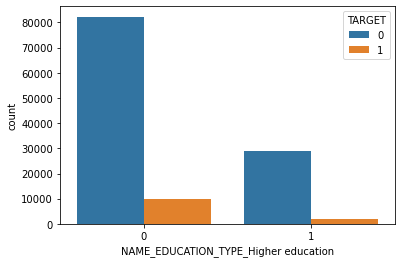

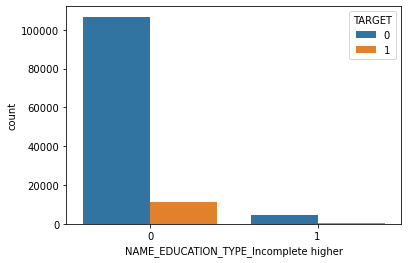

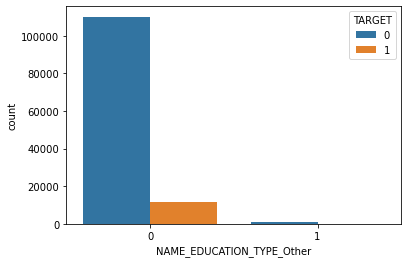

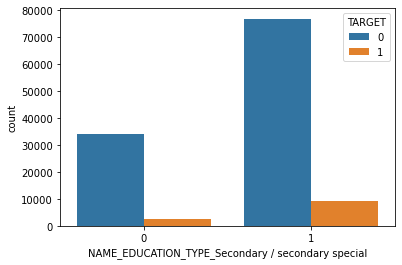

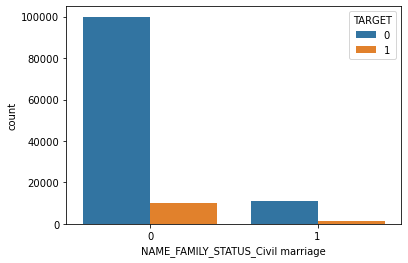

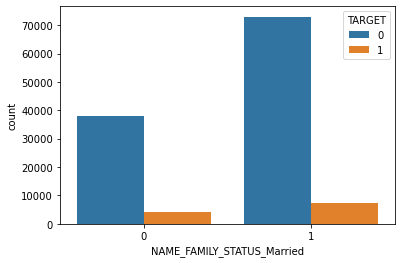

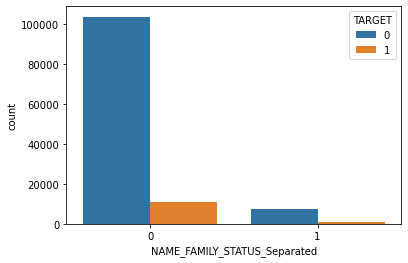

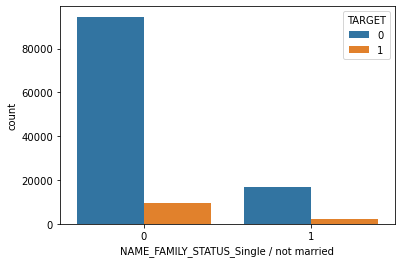

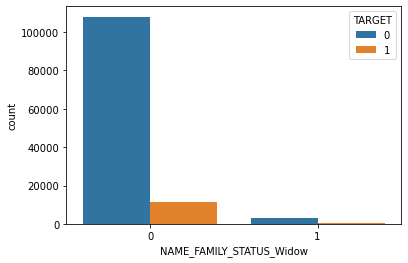

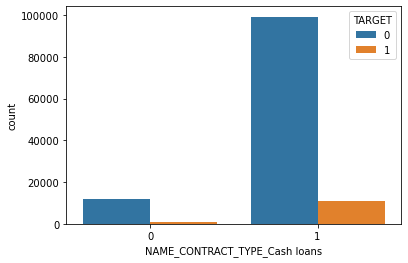

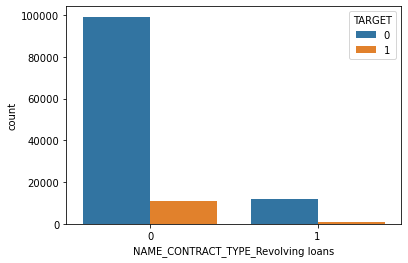

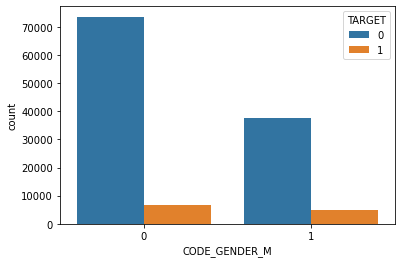

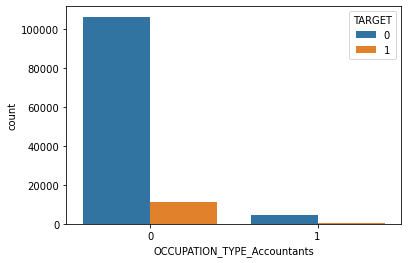

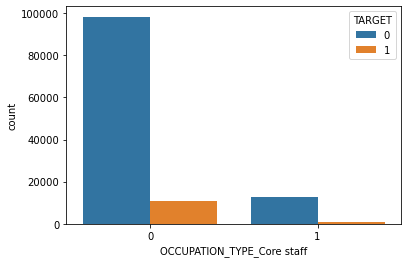

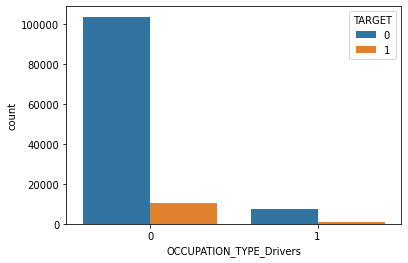

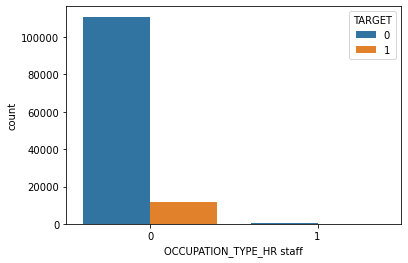

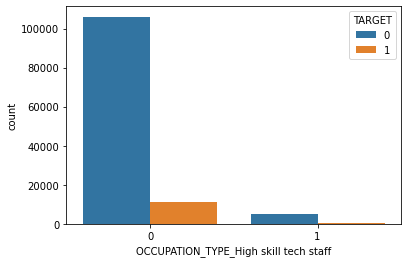

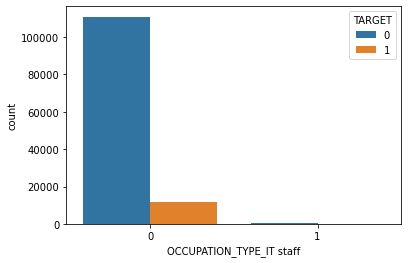

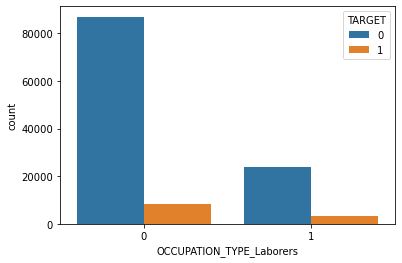

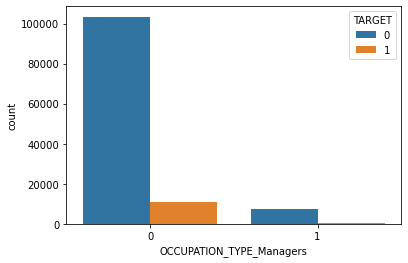

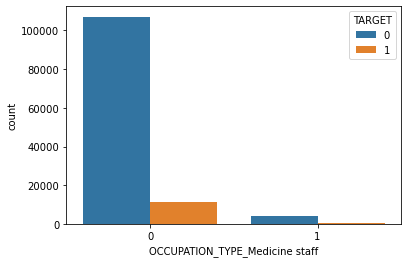

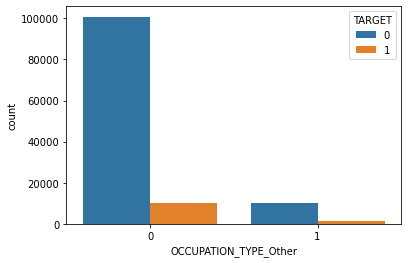

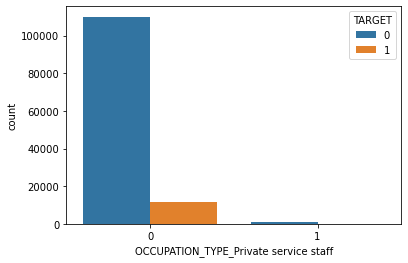

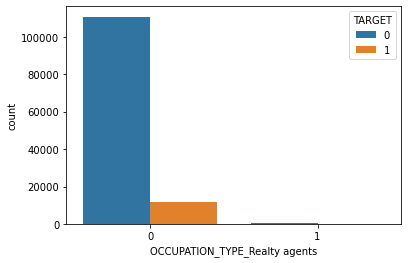

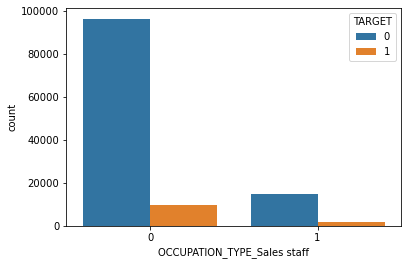

In [9]:
for column in cat:
    sns.countplot(x=column, hue="TARGET", data=df)
    plt.show()

C:\Users\jayse\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


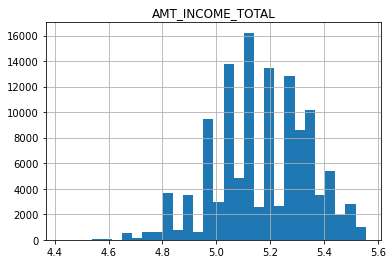

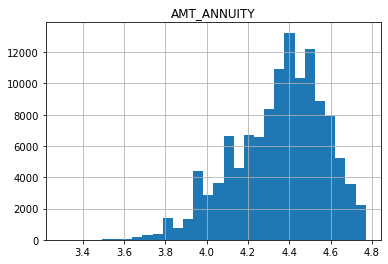

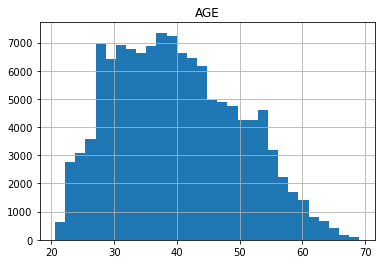

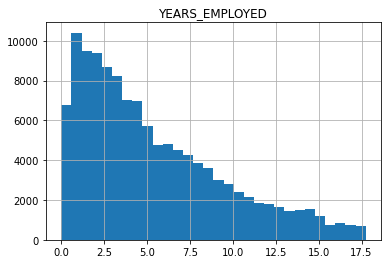

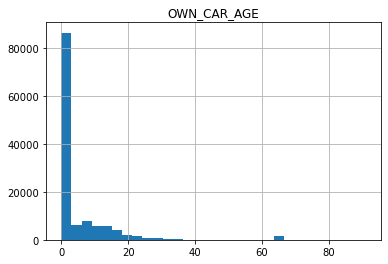

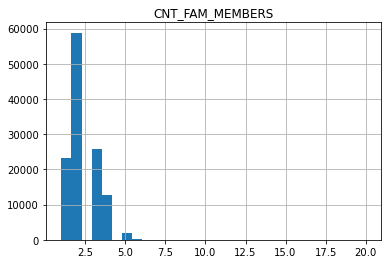

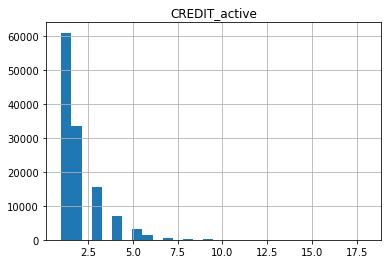

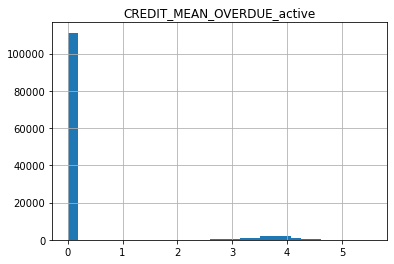

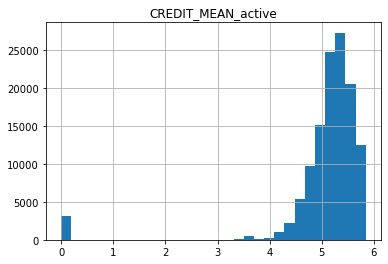

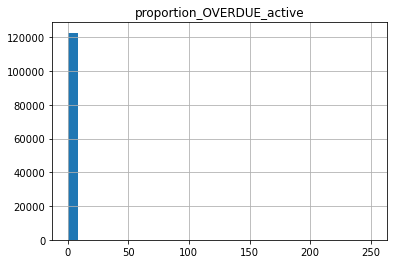

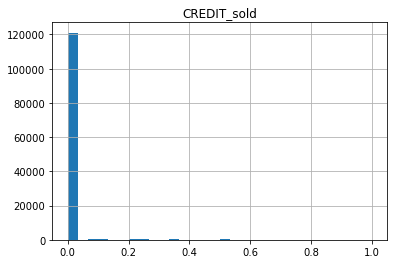

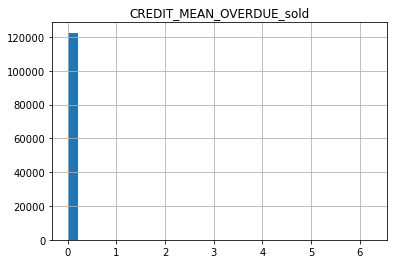

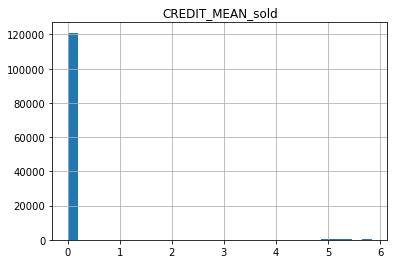

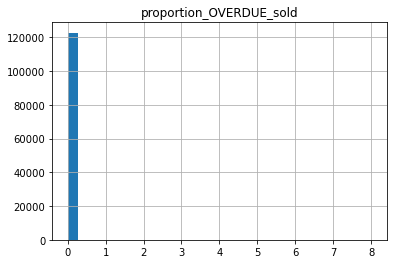

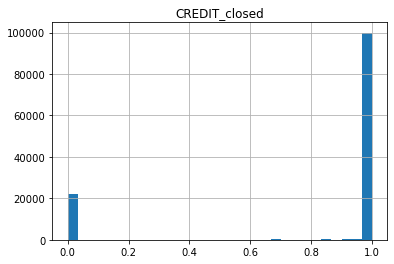

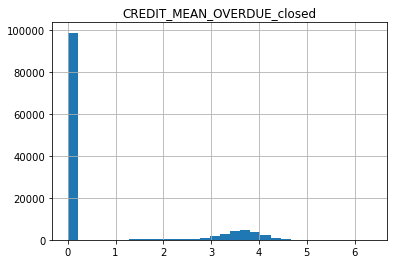

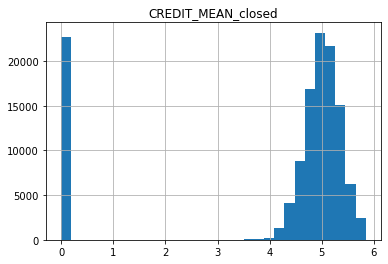

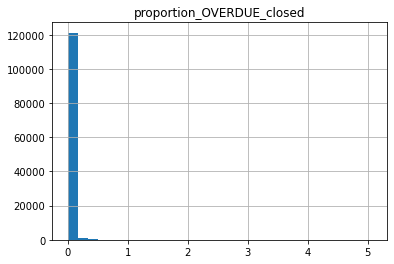

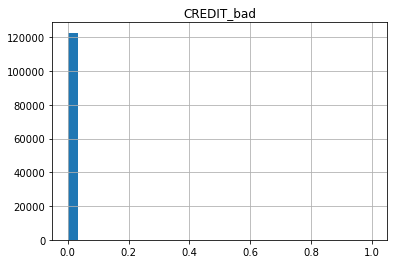

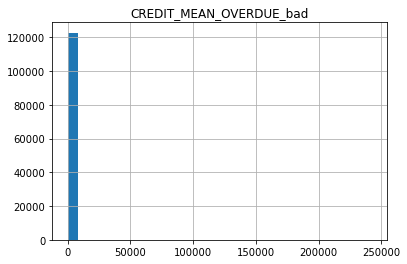

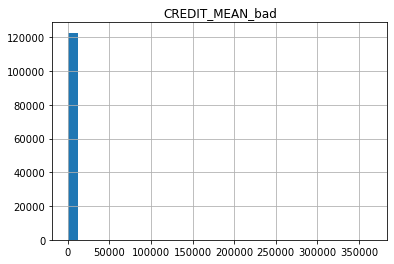

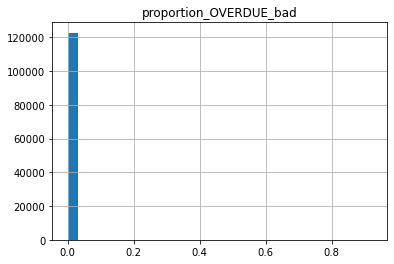

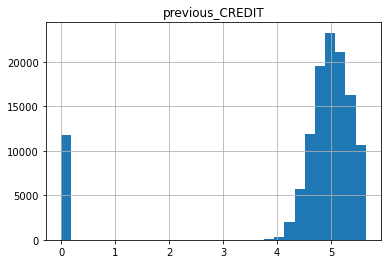

In [10]:
for i in range(len(col)):
    data.hist(col[i], bins = 30)

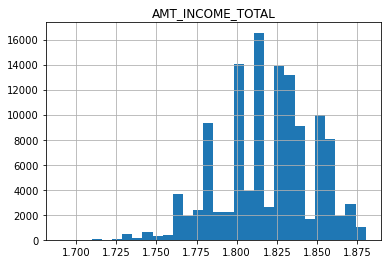

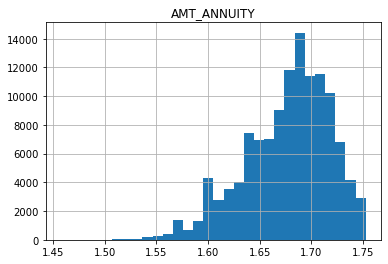

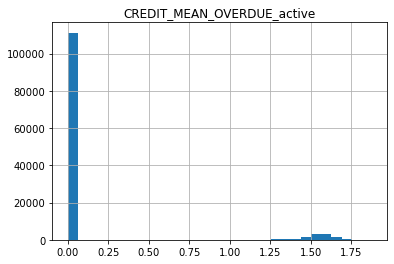

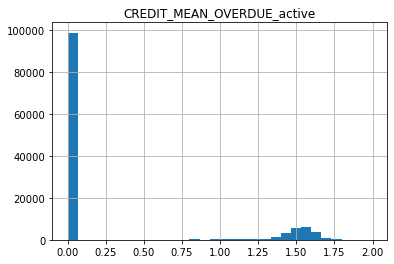

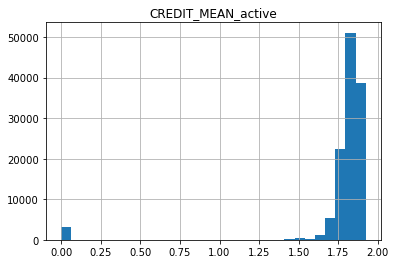

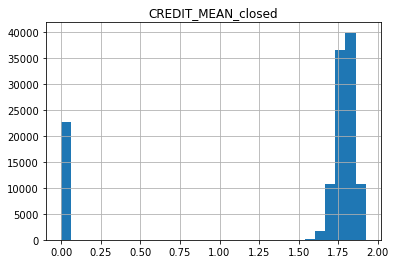

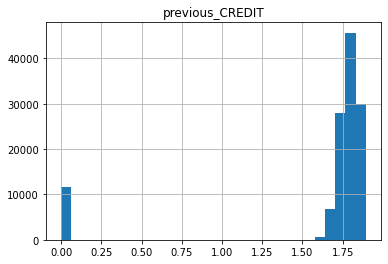

In [11]:
#apply log to flat distribution
np.log(data["AMT_INCOME_TOTAL"]+1).hist(bins = 30)
plt.title("AMT_INCOME_TOTAL")
plt.show()
np.log(data["AMT_ANNUITY"]+1).hist(bins = 30)
plt.title("AMT_ANNUITY")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_active")
plt.show()
np.log(data["CREDIT_MEAN_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_closed")
plt.show()
np.log(data["previous_CREDIT"]+1).hist(bins = 30)
plt.title("previous_CREDIT")
plt.show()

# Correlation matrix

<AxesSubplot:>

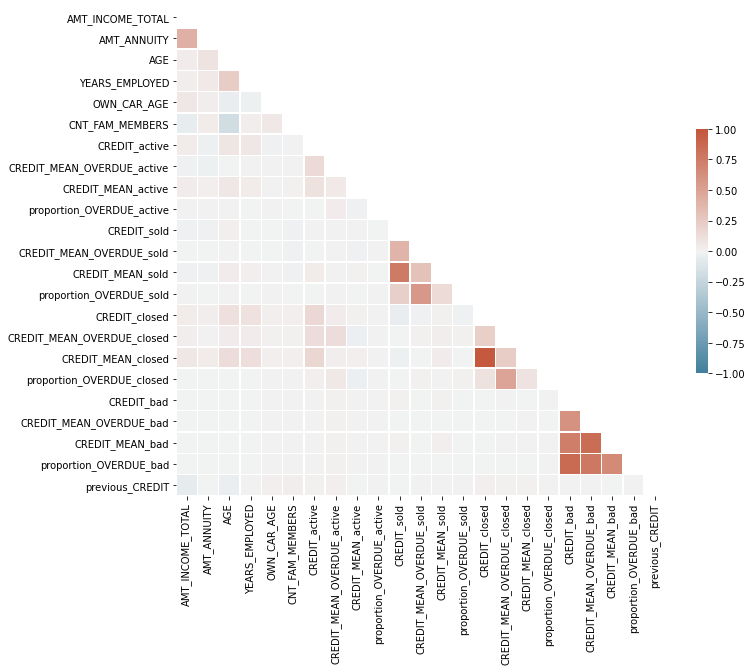

In [12]:
corrM = df[col].corr()
# Correlation matrix for no boolean variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrM, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           vmin=-1, vmax=1)

Some variables are correlated. The correlation between them is not surprising

# Candidat's sex

In [13]:
tmp = df[df["TARGET"] == 0]["CODE_GENDER_M"].value_counts(normalize = True)
"For accepted loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For accepted loan sex ratio between female and male are 0.66/0.34'

In [14]:
tmp = df[df["TARGET"] == 1]["CODE_GENDER_M"].value_counts(normalize = True)
"For rejected loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For rejected loan sex ratio between female and male are 0.58/0.42'

To avoid any bias due to candidat's sex, **"CODE_GENDER_M"** is removed.

In [15]:
df = df.drop("CODE_GENDER_M", axis = 1)

# Education type

In [16]:
col = []
for columns in df.columns:
    if columns[:19] == "NAME_EDUCATION_TYPE":
        col.append(columns)

## Application rejected

In [17]:
df[df["TARGET"] == 1][col].sum()

NAME_EDUCATION_TYPE_Higher education                 1898
NAME_EDUCATION_TYPE_Incomplete higher                 454
NAME_EDUCATION_TYPE_Other                             158
NAME_EDUCATION_TYPE_Secondary / secondary special    9153
dtype: int64

<AxesSubplot:ylabel='None'>

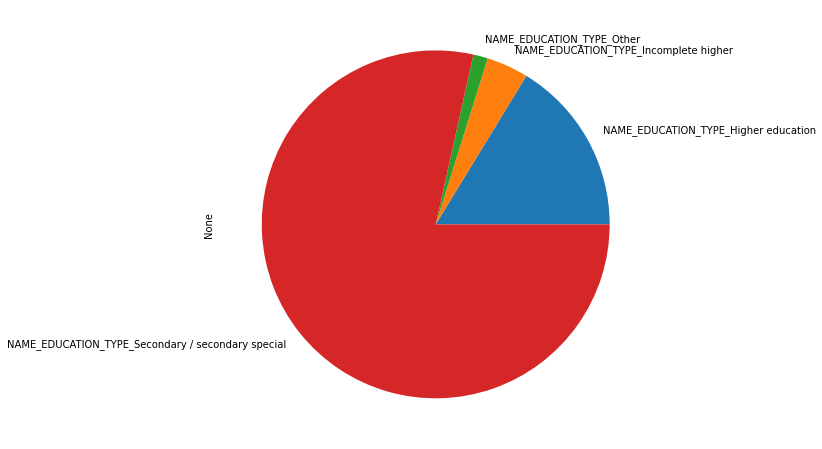

In [18]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [19]:
df[df["TARGET"] == 0][col].sum()

NAME_EDUCATION_TYPE_Higher education                 28887
NAME_EDUCATION_TYPE_Incomplete higher                 4372
NAME_EDUCATION_TYPE_Other                             1011
NAME_EDUCATION_TYPE_Secondary / secondary special    76828
dtype: int64

<AxesSubplot:ylabel='None'>

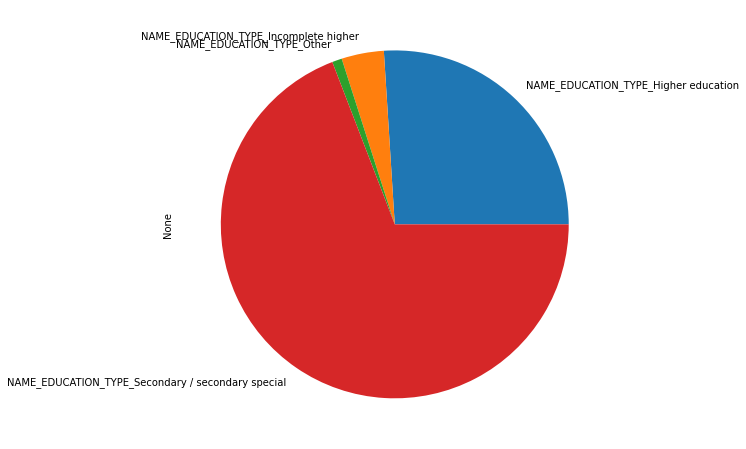

In [20]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Family status

In [21]:
len("NAME_FAMILY_STATUS")

18

In [22]:
col = []
for columns in df.columns:
    if columns[:18] == "NAME_FAMILY_STATUS":
        col.append(columns)

## Application rejected

In [23]:
df[df["TARGET"] == 1][col].sum()

NAME_FAMILY_STATUS_Civil marriage          1386
NAME_FAMILY_STATUS_Married                 7319
NAME_FAMILY_STATUS_Separated                732
NAME_FAMILY_STATUS_Single / not married    2006
NAME_FAMILY_STATUS_Widow                    220
dtype: int64

<AxesSubplot:ylabel='None'>

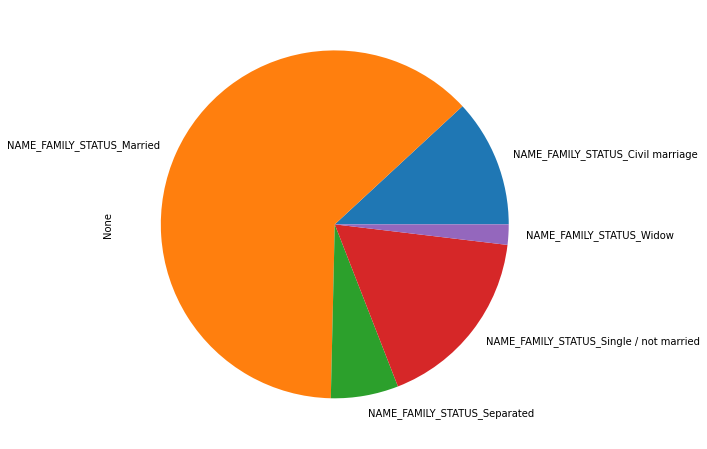

In [24]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [25]:
df[df["TARGET"] == 0][col].sum()

NAME_FAMILY_STATUS_Civil marriage          11138
NAME_FAMILY_STATUS_Married                 72930
NAME_FAMILY_STATUS_Separated                7304
NAME_FAMILY_STATUS_Single / not married    16607
NAME_FAMILY_STATUS_Widow                    3119
dtype: int64

<AxesSubplot:ylabel='None'>

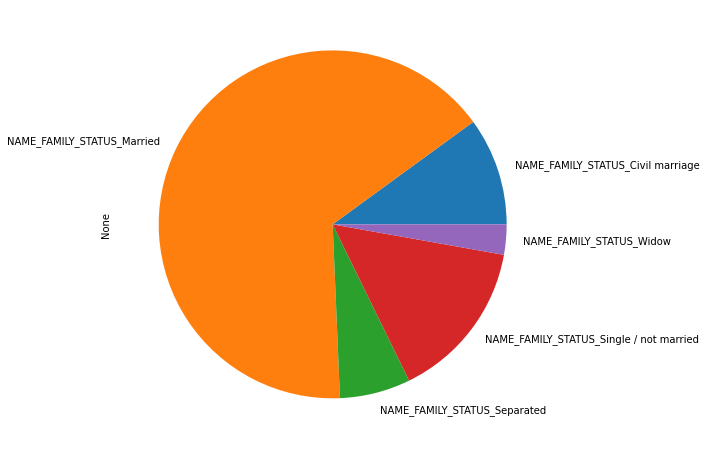

In [26]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Occupation type

In [27]:
len("OCCUPATION_TYPE")

15

In [28]:
col = []
for columns in df.columns:
    if columns[:15] == "OCCUPATION_TYPE":
        col.append(columns)

In [29]:
df[df["TARGET"] == 1][col].sum()

OCCUPATION_TYPE_Accountants               262
OCCUPATION_TYPE_Core staff                987
OCCUPATION_TYPE_Drivers                  1018
OCCUPATION_TYPE_HR staff                   19
OCCUPATION_TYPE_High skill tech staff     372
OCCUPATION_TYPE_IT staff                   16
OCCUPATION_TYPE_Laborers                 3124
OCCUPATION_TYPE_Managers                  558
OCCUPATION_TYPE_Medicine staff            348
OCCUPATION_TYPE_Other                    1316
OCCUPATION_TYPE_Private service staff      78
OCCUPATION_TYPE_Realty agents              27
OCCUPATION_TYPE_Sales staff              1722
dtype: int64

In [30]:
df[df["TARGET"] == 0][col].sum()

OCCUPATION_TYPE_Accountants               4587
OCCUPATION_TYPE_Core staff               12855
OCCUPATION_TYPE_Drivers                   7399
OCCUPATION_TYPE_HR staff                   251
OCCUPATION_TYPE_High skill tech staff     5084
OCCUPATION_TYPE_IT staff                   219
OCCUPATION_TYPE_Laborers                 24100
OCCUPATION_TYPE_Managers                  7686
OCCUPATION_TYPE_Medicine staff            4058
OCCUPATION_TYPE_Other                    10323
OCCUPATION_TYPE_Private service staff     1120
OCCUPATION_TYPE_Realty agents              337
OCCUPATION_TYPE_Sales staff              14661
dtype: int64

Text(0.5, 1.0, 'Occupation type for accepted credits')

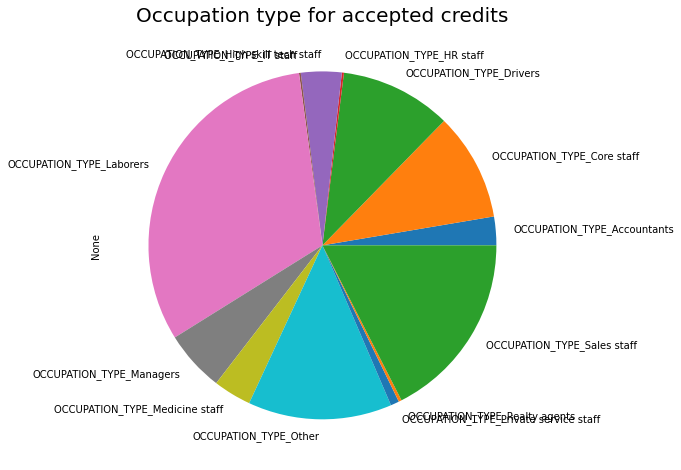

In [31]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

Text(0.5, 1.0, 'Occupation type for accepted credits')

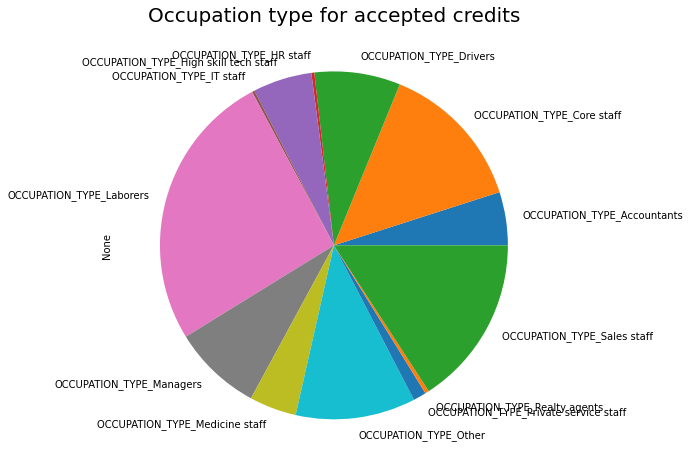

In [32]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

# Logisitc regression

In [33]:
def score_regression(y_test, y_pred, verbose = True):
    """
    Evaluate prediction by computing sensibility,
    specificity, precision, accurary and F-mesure
    """
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    score = {}
    score["sensibility"] = tp/(tp+fn)
    score["specificity"] = tn/(fp+tn)
    if tp+fp == 0:
        score["precision"] = 0
    else:
        score["precision"] = tp/(tp+fp)
    score["accuracy"] = (tp+tn)/(tn+fn+tp+fp)
    if score["sensibility"] + score["precision"] == 0:
        score["f_mesure"] = 0
    else:
        score["f_mesure"] = 2 * (score["precision"] * score["sensibility"]
        )/(score["sensibility"] + score["precision"])
    if verbose:
        print("TN: {0}, FP: {1}, FN: {2}, TP: {3}".format(tn, fp, fn, tp))
        print("Sensibility (rate of true positif) {0}".format(score["sensibility"]))
        print("Specificity (rate of true negatif) {0:.3f}".format(score["specificity"]))
        if score["precision"] == 0:
            print("Denominator is zero. impossible to compute precision ! Change ratio True and False")
        else:
            print("Precision (proportion of correct prediction of positif) {0:.3f}".format(score["precision"]))
        print("Accurary (proportion of correct prediction) {0:.3f}".format(score["accuracy"]))
        if score["f_mesure"] == 0:
            print("Denominator is zero. impossible to compute F-mesure ! Change ratio True and False\n")
        else:
            print("F-mesure {0:.3f}\n".format(score["f_mesure"]))
    return score

In [34]:
def process_logisitic_reg(X, Y, n_split = 5, display = True):
    """
    Made a logisitic regression return models.
    Display sensibility, specificity and acuracy score
    Arguments:
        _X: numpy array (features)
        _Y: numpy array (label)
    Return:
        mdl: models create
        scores: list of dictionary with sensibility, specificity, precision,
        accurary and F-mesure for each fold.
    """
    #X = data.copy()
    #Y = target.copy()
    #Y.replace({0: False, 1: True}, inplace=True)
    skf = StratifiedKFold(n_splits = n_split, random_state = 42, shuffle = True)
    skf.split(X, Y)
    mdl = []
    scores = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        lr = LogisticRegression(C=10, max_iter = 50000).fit(X_train, np.ravel(y_train))
        y_pred = lr.predict(X_test)
        mdl.append(lr)
        scores.append(score_regression(y_test, y_pred, display))
    return mdl, scores

In [35]:
mdl, scores = process_logisitic_reg(data.copy().to_numpy(), target.copy().to_numpy())

TN: 22219.0, FP: 1.0, FN: 2333.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Denominator is zero. impossible to compute precision ! Change ratio True and False
Accurary (proportion of correct prediction) 0.905
Denominator is zero. impossible to compute F-mesure ! Change ratio True and False

TN: 22218.0, FP: 1.0, FN: 2333.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Denominator is zero. impossible to compute precision ! Change ratio True and False
Accurary (proportion of correct prediction) 0.905
Denominator is zero. impossible to compute F-mesure ! Change ratio True and False

TN: 22217.0, FP: 2.0, FN: 2333.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Denominator is zero. impossible to compute precision ! Change ratio True and False
Accurary (proportion of correct prediction) 0.905
Denominator is zero. impossible to compute F-mesure ! Change ratio Tr

## Results

### ROC curve

In [36]:
#take a subset
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
skf.split(X, Y)
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]


In [37]:
sensibility = []
for i in range(len(scores)):
    sensibility.append((scores[i]["sensibility"]))
indice = np.where(sensibility == np.max(sensibility))[0][0]
best_mdl = mdl[indice]

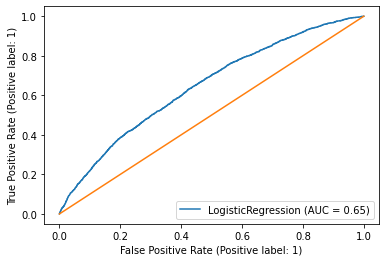

In [38]:
metrics.plot_roc_curve(best_mdl, X_test, y_test)
plt.plot([0, 1], [0, 1], label = "baseline")
plt.show()
plt.show()

The logisitic regression model is not effecient to reject bad loan. It can not be used and we must improve it.

In [39]:
tmp = target.sum() / target.shape[0] *100
tmp2 = target.sum() / (target.shape[0]-target.sum()) *100
print("The proportion of True label is {0:.2f}%. It is {1} time less than False.\n\
New datasets are created with less accepted loan.".format(tmp[0], int(tmp2)))

The proportion of True label is 9.50%. It is 10 time less than False.
New datasets are created with less accepted loan.


## New dataset

The number of rejected loan is low compared to accepted loan. Moreover feature are quite equilibrate beetween 2 labels.
True label are increased with data augmentation (adding noises). To be sure there is no overfitting, an unbiased sample will be used. 

In [40]:
def add_noise(X, shape = None, dispersion = 1):
    """
    Generate new samples and add to data given.
    Samples generated follow distribution center to X's mean
    with X's standard deviation
    Arguments:
        _X array
        _Data dimension (which dimension)
        _dispersion: factor to scale standard deviation
    Return
        Array with new data
    """
    std = np.std(X, axis = 0)/dispersion
    means = np.mean(X, axis = 0)
    if shape is None:
        lines = np.shape(X)[0]
        col = np.shape(X)[1]
        Xnoisy =  np.zeros((lines, col))
    else:
        Xnoisy =  np.zeros((shape[0], shape[1]))
    for i in range(np.shape(X)[1]):
        noise = np.random.normal(loc=means[i], scale=std[i], size = np.shape(Xnoisy)[0])
        #convert to int for boolen features
        Xnoisy[:,i] += noise.astype(int)
    return Xnoisy

In [41]:
def best_score_model(mdl, scores, metric = "f_mesure"):
    tmp = []
    for i in range(len(scores)):
        tmp.append(scores[i][metric])
    indice = np.where(tmp == np.max(tmp))[0][0]
    return mdl[i], scores[i]

In [42]:
indices_true = np.where(target == 1)[0]
indices_false = np.arange(0, target.shape[0])
indices_false = np.setdiff1d(indices_false, indices_true)
#shuffle indice
np.random.shuffle(indices_true)
np.random.shuffle(indices_false)

Create a Test validation by taking off 20% of label True and False

In [43]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()

# Test set

In [44]:
#Label True 
ind_true_Test = np.random.choice(indices_true, int(len(indices_true)*0.2), replace = False)
#Label False
ind_False_Test = np.random.choice(indices_false, int(len(indices_false)*0.2), replace = False)
ind_Test = np.concatenate([ind_true_Test, ind_False_Test])
X_test = X[ind_Test]
Y_test = Y[ind_Test]

# Training set

Example of adding noises with specific parameters

In [45]:
#indice use for cross validation
ind_true_CV = np.setdiff1d(indices_true, ind_true_Test)
ind_false_CV = np.setdiff1d(indices_false, ind_False_Test)
#ind_Test = np.concatenate([ind_true_CV, ind_false_CV])

In [46]:
Xnoisy_True = add_noise(X[ind_true_CV], dispersion = 1)
Xnoisy_True = np.concatenate([X[ind_true_CV], Xnoisy_True])
Ynoisy_True = np.repeat([True], np.shape(Xnoisy_True)[0])

In [47]:
%%time
nb_true = np.shape(X[ind_true_CV])[0]
nb_false = np.shape(X[ind_false_CV])[0]
step = 2.5
mdl = []
scores = []
for i in range(0, int(nb_false / nb_true /step)):
    #print(str((i*2)*nb_true)+" "+str((i+1)*2*nb_true))
    tmp = X[ind_false_CV][int(i*step*nb_true) : int((i+1)*step*nb_true)]
    X_Train = np.concatenate([Xnoisy_True, tmp])
    Y_Train = np.concatenate([Ynoisy_True, np.repeat([False], len(tmp))])
    tmp_mdl, tmp_scores = process_logisitic_reg(X_Train, Y_Train, display = True)
    mdl.append(tmp_mdl)
    scores.append(tmp_scores)

TN: 4541.0, FP: 124.0, FN: 1759.0, TP: 1974.0
Sensibility (rate of true positif) 0.5287972140369676
Specificity (rate of true negatif) 0.973
Precision (proportion of correct prediction of positif) 0.941
Accurary (proportion of correct prediction) 0.776
F-mesure 0.677

TN: 4516.0, FP: 149.0, FN: 1747.0, TP: 1986.0
Sensibility (rate of true positif) 0.5320117867666756
Specificity (rate of true negatif) 0.968
Precision (proportion of correct prediction of positif) 0.930
Accurary (proportion of correct prediction) 0.774
F-mesure 0.677

TN: 4533.0, FP: 133.0, FN: 1805.0, TP: 1927.0
Sensibility (rate of true positif) 0.5163451232583065
Specificity (rate of true negatif) 0.971
Precision (proportion of correct prediction of positif) 0.935
Accurary (proportion of correct prediction) 0.769
F-mesure 0.665

TN: 4536.0, FP: 130.0, FN: 1741.0, TP: 1991.0
Sensibility (rate of true positif) 0.5334941050375134
Specificity (rate of true negatif) 0.972
Precision (proportion of correct prediction of posit

KeyboardInterrupt: 

In [48]:
tmp_mdl = []
tmp_score = []
for i in range(len(mdl)):
    #best model for each CV
    tmp1, tmp2 = best_score_model(mdl[i], scores[i], metric = "f_mesure") 
    tmp_mdl.append(tmp1)
    tmp_score.append(tmp2)
#model with the best score
best_mdl, score = best_score_model(tmp_mdl, tmp_score, metric = "f_mesure") 

In [49]:
score_regression(best_mdl.predict(X_test), np.ravel(Y_test), verbose = True)

TN: 21601.0, FP: 2150.0, FN: 618.0, TP: 182.0
Sensibility (rate of true positif) 0.2275
Specificity (rate of true negatif) 0.909
Precision (proportion of correct prediction of positif) 0.078
Accurary (proportion of correct prediction) 0.887
F-mesure 0.116



{'sensibility': 0.2275,
 'specificity': 0.9094774956843923,
 'precision': 0.07804459691252144,
 'accuracy': 0.8872551016251884,
 'f_mesure': 0.11621966794380588}

In [50]:
#export model
dump(best_mdl, 'logisitc_model1.joblib')

['logisitc_model1.joblib']

# Grid seach

Looking for best parameters between sample size and noise dispersion

In [51]:
%%time
steps = [1, 2, 2.25]
dispersions = [1, 1.15, 1.5, 1.75]
mat_score = np.zeros((len(steps),len(dispersions) ))
models = []
for line, step in enumerate(steps):
    for colone, dispersion in enumerate(dispersions):
        ###################################################
        #                        test                     #
        ###################################################
        #indice use for cross validation
        ind_true_CV = np.setdiff1d(indices_true, ind_true_Test)
        ind_false_CV = np.setdiff1d(indices_false, ind_False_Test)
        #ind_Test = np.concatenate([ind_true_CV, ind_false_CV])

        Xnoisy_True = add_noise(X[ind_true_CV], dispersion = dispersion)
        Xnoisy_True = np.concatenate([X[ind_true_CV], Xnoisy_True])
        Ynoisy_True = np.repeat([True], np.shape(Xnoisy_True)[0])

        nb_true = np.shape(X[ind_true_CV])[0]
        nb_false = np.shape(X[ind_false_CV])[0]
        mdl = []
        scores = []
        for i in range(0, int(nb_false / nb_true /step)):
            #print(str((i*2)*nb_true)+" "+str((i+1)*2*nb_true))
            tmp = X[ind_false_CV][int(i*step*nb_true) : int((i+1)*step*nb_true)]
            X_Train = np.concatenate([Xnoisy_True, tmp])
            Y_Train = np.concatenate([Ynoisy_True, np.repeat([False], len(tmp))])
            tmp_mdl, tmp_scores = process_logisitic_reg(X_Train, Y_Train, display = False)
            mdl.append(tmp_mdl)
            scores.append(tmp_scores)
        ###################################################
        #                    best model                   #
        ###################################################
        tmp_mdl = []
        tmp_score = []
        for i in range(len(mdl)):
            #best model for each CV
            tmp1, tmp2 = best_score_model(mdl[i], scores[i], metric = 'f_mesure') 
            tmp_mdl.append(tmp1)
            tmp_score.append(tmp2)
        #model with the best score
        best_mdl, score = best_score_model(tmp_mdl, tmp_score, metric = 'f_mesure')
        #####################SCORE TEST#####################
        mat_score[line, colone] = score_regression(best_mdl.predict(X_test), np.ravel(Y_test), verbose = True)['f_mesure']
        models.append(best_mdl)

TN: 12552.0, FP: 830.0, FN: 9667.0, TP: 1502.0
Sensibility (rate of true positif) 0.13447936252126422
Specificity (rate of true negatif) 0.938
Precision (proportion of correct prediction of positif) 0.644
Accurary (proportion of correct prediction) 0.572
F-mesure 0.223

TN: 12686.0, FP: 831.0, FN: 9533.0, TP: 1501.0
Sensibility (rate of true positif) 0.13603407649084648
Specificity (rate of true negatif) 0.939
Precision (proportion of correct prediction of positif) 0.644
Accurary (proportion of correct prediction) 0.578
F-mesure 0.225

TN: 12842.0, FP: 847.0, FN: 9377.0, TP: 1485.0
Sensibility (rate of true positif) 0.1367151537470079
Specificity (rate of true negatif) 0.938
Precision (proportion of correct prediction of positif) 0.637
Accurary (proportion of correct prediction) 0.584
F-mesure 0.225

TN: 12969.0, FP: 859.0, FN: 9250.0, TP: 1473.0
Sensibility (rate of true positif) 0.13736827380397276
Specificity (rate of true negatif) 0.938
Precision (proportion of correct prediction o

In [52]:
mat_score

array([[0.22250204, 0.22459973, 0.22510232, 0.22566067],
       [0.18250413, 0.17861453, 0.17824186, 0.17908979],
       [0.15334243, 0.14978962, 0.14810595, 0.14823261]])

In [53]:
dim = np.where(mat_score == np.max(mat_score))
step = steps[dim[0][0]]
dispersion = dispersions[dim[1][0]]
print("Best result is optained with {0} false samples.\n\
Noises follow an gaussian with parameters (mean; std/{1}).".format(step, dispersion))

Best result is optained with 1 false samples.
Noises follow an gaussian with parameters (mean; std/1.75).


In [56]:
steps

[1, 2, 2.25]

In [57]:
dispersions

[1, 1.15, 1.5, 1.75]

In [58]:
best_mdl = models[3]

In [59]:
from joblib import dump, load
#export model
dump(best_mdl, 'logisitc_model1_gridSearch.joblib')

['logisitc_model1_gridSearch.joblib']

### ROC curve

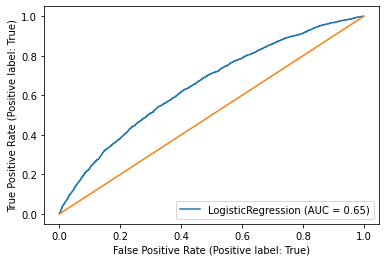

In [60]:
metrics.plot_roc_curve(best_mdl, X_test, np.ravel(Y_test))
plt.plot([0, 1], [0, 1], label = "baseline")
plt.show()
plt.show()

# Random forest

We will try to rationalize model by keeping most important features

In [61]:
%%time
def process_random_forest(X, Y, n_split = 5):
    mdl_clf = []
    skf = StratifiedKFold(n_splits = n_split, random_state = 42, shuffle = True)
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, np.ravel(y_train))
        y_pred = clf.predict(X_test)
        mdl_clf.append(clf)
        F_mesure = score_regression(y_test, y_pred, verbose =False)
    return mdl_clf

Wall time: 0 ns


In [62]:
%%time
#indice use for cross validation
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
ind_true_CV = np.setdiff1d(indices_true, ind_true_Test)
ind_false_CV = np.setdiff1d(indices_false, ind_False_Test)
#ind_Test = np.concatenate([ind_true_CV, ind_false_CV])

Xnoisy_True = add_noise(X[ind_true_CV], dispersion = dispersion)
Xnoisy_True = np.concatenate([X[ind_true_CV], Xnoisy_True])
Ynoisy_True = np.repeat([True], np.shape(Xnoisy_True)[0])

nb_true = np.shape(X[ind_true_CV])[0]
nb_false = np.shape(X[ind_false_CV])[0]
scores = []
for i in range(0, int(nb_false / nb_true /step)):
    tmp = X[ind_false_CV][int(i*step*nb_true) : int((i+1)*step*nb_true)]
    X_Train = np.concatenate([Xnoisy_True, tmp])
    Y_Train = np.concatenate([Ynoisy_True, np.repeat([False], len(tmp))])
    clf = process_random_forest(X_Train, Y_Train)

score_regression(clf[-1].predict(X_test), np.ravel(Y_test), verbose = True)['f_mesure']

TN: 13193.0, FP: 906.0, FN: 9026.0, TP: 1426.0
Sensibility (rate of true positif) 0.13643321852277077
Specificity (rate of true negatif) 0.936
Precision (proportion of correct prediction of positif) 0.611
Accurary (proportion of correct prediction) 0.595
F-mesure 0.223

Wall time: 2min 9s


0.22309136420525658

In [63]:
#export model
dump(best_mdl, 'random_forest_model.joblib')

['random_forest_model.joblib']

## Reduce features dimension

We use attibute **feature_importances_** to select features that contribute the most to prediction. 

In [64]:
#take the last model create
features = []
for cpt, col in enumerate(data.columns):
    #clf.feature_importances_
    if clf[-1].feature_importances_[cpt] >= 0.01:
        print(col+" {0:.4f}".format(clf[-1].feature_importances_[cpt]))
        features.append(col)

AMT_INCOME_TOTAL 0.0857
AMT_ANNUITY 0.1259
AGE 0.0741
YEARS_EMPLOYED 0.0752
OWN_CAR_AGE 0.0289
CNT_FAM_MEMBERS 0.0211
NAME_EDUCATION_TYPE_Higher education 0.0157
NAME_EDUCATION_TYPE_Secondary / secondary special 0.0109
NAME_FAMILY_STATUS_Married 0.0200
NAME_CONTRACT_TYPE_Cash loans 0.0105
CODE_GENDER_M 0.0115
CREDIT_active 0.0249
CREDIT_MEAN_OVERDUE_active 0.0123
CREDIT_MEAN_active 0.0943
proportion_OVERDUE_active 0.0104
CREDIT_closed 0.0278
CREDIT_MEAN_OVERDUE_closed 0.0169
CREDIT_MEAN_closed 0.0826
proportion_OVERDUE_closed 0.0166
previous_CREDIT 0.0719
ratio_ask_get 0.0717


In [65]:
print("initial features {0}, keep only {1}".format(len(data.columns), len(features)))

initial features 49, keep only 21


In [66]:
col = []
cat = []
for column in features:
    if column[:4] == "NAME" or column[:4] == "OCCU" or column[:4] == "CODE":
        cat.append(column)
    else:
        col.append(column)

<AxesSubplot:>

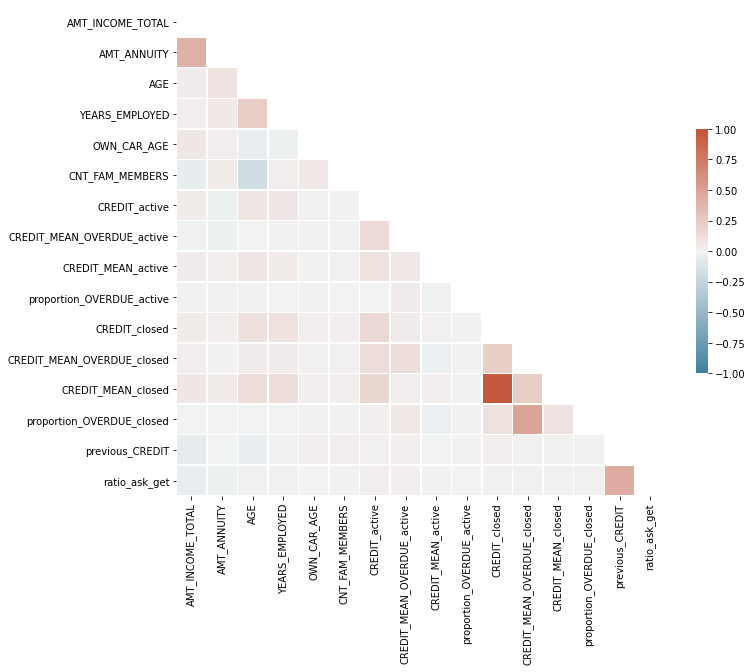

In [67]:
corrM = data[col].corr()
# Correlation matrix for no boolean variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrM, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           vmin=-1, vmax=1)

## New logistic regression model

In [68]:
data[features]

,AMT_INCOME_TOTAL,AMT_ANNUITY,AGE,YEARS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_CONTRACT_TYPE_Cash loans,CODE_GENDER_M,CREDIT_active,CREDIT_MEAN_OVERDUE_active,CREDIT_MEAN_active,proportion_OVERDUE_active,CREDIT_closed,CREDIT_MEAN_OVERDUE_closed,CREDIT_MEAN_closed,proportion_OVERDUE_closed,previous_CREDIT,ratio_ask_get
0,5.306427,4.392723,25.956104,1.747599,0.0,1.0,0,1,0,1,1,1.0,0.000000,5.653213,0.000000,1.0,3.320595,4.884310,0.027295,5.252989,1.000000
1,4.995640,4.439625,46.477366,4.356653,0.0,2.0,0,1,1,1,1,1.0,0.000000,5.427497,0.000000,1.0,0.000000,5.001823,0.000000,5.211571,1.045381
2,5.232999,4.615971,37.799726,8.587106,17.0,3.0,1,0,1,1,0,2.0,0.000000,5.690357,0.000000,1.0,0.000000,5.060920,0.000000,4.845957,0.913944
3,5.051156,4.325885,27.975309,1.862826,0.0,3.0,1,0,1,1,0,2.0,3.804626,5.701461,0.012679,1.0,3.380656,5.217056,0.014569,5.012141,1.065237
4,4.829310,3.769562,36.869684,7.454047,0.0,2.0,0,1,1,1,0,4.0,0.000000,4.925262,0.000000,1.0,0.000000,4.663479,0.000000,5.026216,0.879716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122756,4.908490,3.961397,27.089163,5.289438,0.0,1.0,1,0,0,1,1,2.0,0.000000,3.829368,0.000000,1.0,4.009607,4.927932,0.120681,4.620197,0.980481
122757,5.255275,4.080248,45.758573,3.352538,0.0,2.0,0,1,1,1,0,2.0,0.000000,5.255275,0.000000,1.0,0.000000,5.352184,0.000000,5.358871,1.255449
122758,5.296667,4.717417,52.406036,10.120713,10.0,2.0,0,1,1,1,1,1.0,0.000000,5.296667,0.000000,0.0,0.000000,0.000000,0.000000,5.028024,1.072642
122759,5.416642,4.556097,55.939643,14.611797,0.0,2.0,1,0,1,1,0,3.0,4.032959,5.477123,0.035958,1.0,3.381789,5.420549,0.009142,5.543381,1.146683


## Test set

In [69]:
X = data[features].copy().to_numpy()
Y = df["TARGET"].copy().to_numpy()

In [70]:
#Label True 
ind_true_Test = np.random.choice(indices_true, int(len(indices_true)*0.2), replace = False)
#Label False
ind_False_Test = np.random.choice(indices_false, int(len(indices_false)*0.2), replace = False)
ind_Test = np.concatenate([ind_true_Test, ind_False_Test])
X_test = X[ind_Test]
Y_test = Y[ind_Test]

## Training set

Example of adding noises with specific parameters

In [71]:
#indice use for cross validation
ind_true_CV = np.setdiff1d(indices_true, ind_true_Test)
ind_false_CV = np.setdiff1d(indices_false, ind_False_Test)
#ind_Test = np.concatenate([ind_true_CV, ind_false_CV])

In [72]:
Xnoisy_True = add_noise(X[ind_true_CV], dispersion = 1)
Xnoisy_True = np.concatenate([X[ind_true_CV], Xnoisy_True])
Ynoisy_True = np.repeat([True], np.shape(Xnoisy_True)[0])

In [73]:
%%time
steps = [1, 2, 2.25]
dispersions = [0.75, 1, 1.15, 1.5]
mat_score = np.zeros((len(steps),len(dispersions) ))
for line, step in enumerate(steps):
    for colone, dispersion in enumerate(dispersions):
        ###################################################
        #                        test                     #
        ###################################################
        #indice use for cross validation
        ind_true_CV = np.setdiff1d(indices_true, ind_true_Test)
        ind_false_CV = np.setdiff1d(indices_false, ind_False_Test)
        #ind_Test = np.concatenate([ind_true_CV, ind_false_CV])

        Xnoisy_True = add_noise(X[ind_true_CV], dispersion = dispersion)
        Xnoisy_True = np.concatenate([X[ind_true_CV], Xnoisy_True])
        Ynoisy_True = np.repeat([True], np.shape(Xnoisy_True)[0])

        nb_true = np.shape(X[ind_true_CV])[0]
        nb_false = np.shape(X[ind_false_CV])[0]
        mdl = []
        scores = []
        for i in range(0, int(nb_false / nb_true /step)):
            #print(str((i*2)*nb_true)+" "+str((i+1)*2*nb_true))
            tmp = X[ind_false_CV][int(i*step*nb_true) : int((i+1)*step*nb_true)]
            X_Train = np.concatenate([Xnoisy_True, tmp])
            Y_Train = np.concatenate([Ynoisy_True, np.repeat([False], len(tmp))])
            tmp_mdl, tmp_scores = process_logisitic_reg(X_Train, Y_Train, display = False)
            mdl.append(tmp_mdl)
            scores.append(tmp_scores)
        ###################################################
        #                    best model                   #
        ###################################################
        tmp_mdl = []
        tmp_score = []
        for i in range(len(mdl)):
            #best model for each CV
            tmp1, tmp2 = best_score_model(mdl[i], scores[i], metric = 'sensibility') 
            tmp_mdl.append(tmp1)
            tmp_score.append(tmp2)
        #model with the best score
        best_mdl, score = best_score_model(tmp_mdl, tmp_score, metric = 'sensibility')
        #####################SCORE TEST#####################
        mat_score[line, colone] = score_regression(best_mdl.predict(X_test), np.ravel(Y_test), verbose = True)['sensibility']

TN: 9961.0, FP: 762.0, FN: 12258.0, TP: 1570.0
Sensibility (rate of true positif) 0.11353774949378073
Specificity (rate of true negatif) 0.929
Precision (proportion of correct prediction of positif) 0.673
Accurary (proportion of correct prediction) 0.470
F-mesure 0.194

TN: 10412.0, FP: 781.0, FN: 11807.0, TP: 1551.0
Sensibility (rate of true positif) 0.11611019613714628
Specificity (rate of true negatif) 0.930
Precision (proportion of correct prediction of positif) 0.665
Accurary (proportion of correct prediction) 0.487
F-mesure 0.198

TN: 10631.0, FP: 804.0, FN: 11588.0, TP: 1528.0
Sensibility (rate of true positif) 0.11649893260140287
Specificity (rate of true negatif) 0.930
Precision (proportion of correct prediction of positif) 0.655
Accurary (proportion of correct prediction) 0.495
F-mesure 0.198

TN: 10980.0, FP: 816.0, FN: 11239.0, TP: 1516.0
Sensibility (rate of true positif) 0.11885535084280674
Specificity (rate of true negatif) 0.931
Precision (proportion of correct predicti

In [74]:
mat_score

array([[0.11353775, 0.1161102 , 0.11649893, 0.11885535],
       [0.126     , 0.13145821, 0.13325057, 0.13575482],
       [0.12998624, 0.13556382, 0.1381201 , 0.14356436]])

Results are weaker than previous model. 